In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis


# Load the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# View the first few rows of the dataset
print(df.head())

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

In [2]:
# 1. Frecuency Tables:
#  Generate the frequency table for product categories
category_counts = df['category'].value_counts()

# Display the table of the 5 most common categories
# Question: Which are the top 5 most listed product categories?
top_5_categories = category_counts.head(5)
print("The top 5 most popular categories are:")
print(top_5_categories)

# Answer:
# Sports & Outdoors                         836265
# Beauty                                     19312
# Handmade Clothing, Shoes & Accessories     19229
# Bath & Body                                19092
# Birthday Gifts                             18978


The top 5 most popular categories are:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


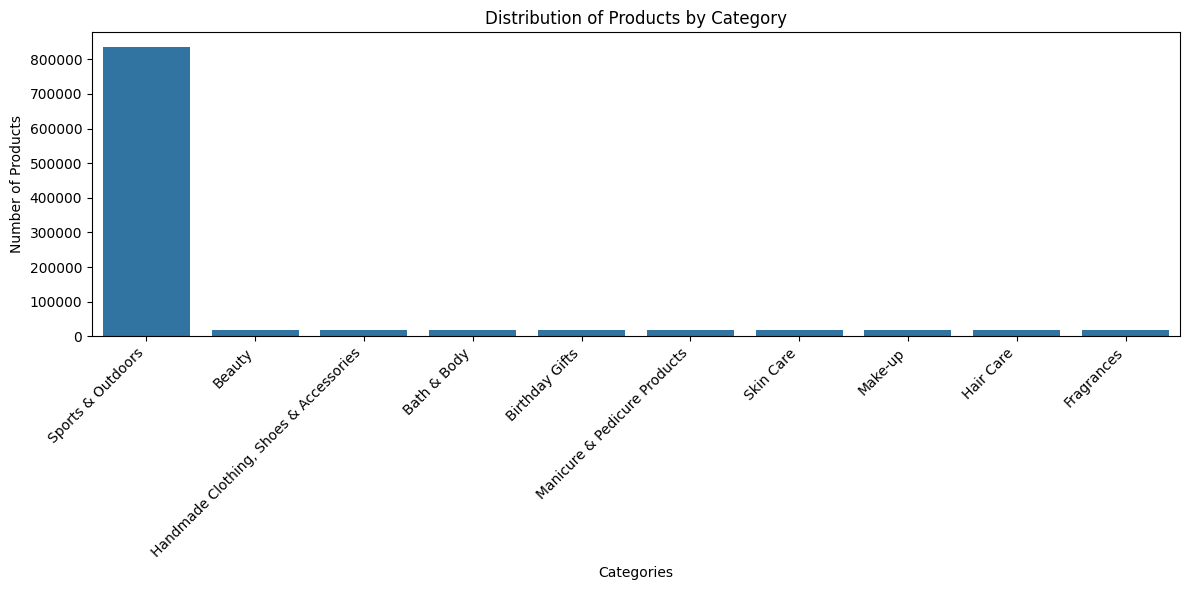

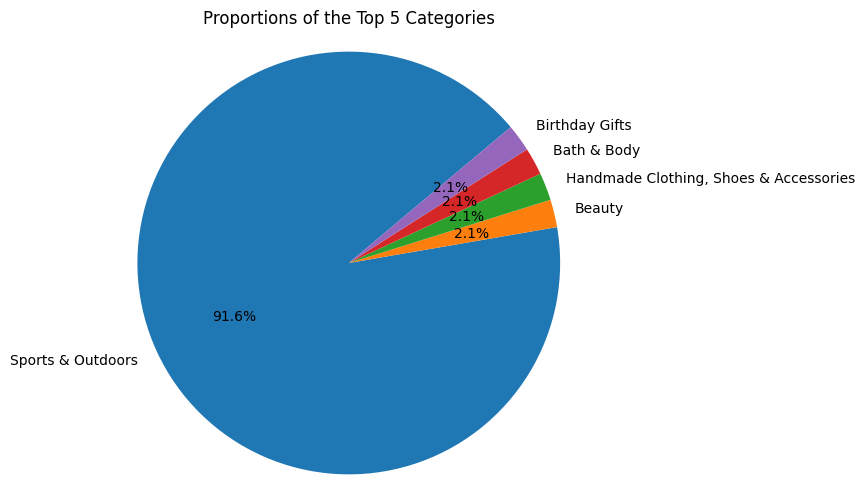

In [3]:
# 2. Visualizations:
# Visualization of the distribution of products across categories using a bar chart
# Question: How are products distributed across different categories?
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10])
plt.title('Distribution of Products by Category')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categories')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

# Answer: There are a uniform distribution of products across the chart, except for the 'Sports & Outdoors' category.

# Visualization of proportions of the top 5 common categories using a pie chart
# Question: For a subset of top categories, visualize their proportions using a pie chart.
# Does any category dominate the listings?
plt.figure(figsize=(6, 6))
plt.pie(top_5_categories, labels=top_5_categories.index, autopct='%1.1f%%', startangle=40)
plt.title('Proportions of the Top 5 Categories')
plt.axis('equal')
plt.show()

# Answer: The pie chart demonstrates that 'Sports & Outdoors' is the most dominating category of listings.

Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [4]:
# 1. Measures of Centrality:
# Calculate mean, median, and mode for the price of products
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

# Question: What's the average price point of products listed? How does this compare with the most common price point (mode)?
print(f"Mean (average) price: {mean_price}")
print(f"Median price: {median_price}")
print(f"Mode (most common) price: {mode_price}")

# Answer: The mean gives us the average price point, while the mode shows the price point that appears most frequently.
# Mean (average) price: 89.24380943923663
# Median price: 19.09
# Mode (most common) price: 9.99

Mean (average) price: 89.24380943923663
Median price: 19.09
Mode (most common) price: 9.99


In [5]:
# 2. Measures of Dispersion
# Determine variance, standard deviation, range, and interquartile range (IQR) for product prices
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr_price = q3 - q1

# Question: How varied are the product prices? Are there any indicators of a significant spread in prices?
print(f"Variance in price: {variance_price}")
print(f"Standard deviation in price: {std_dev_price}")
print(f"Range of prices: {range_price}")
print(f"Interquartile range (IQR) of prices: {iqr_price}")

# Answer: These measures tell us how spread out the prices are. A higher variance or standard deviation indicates more variation in prices, while the IQR shows the middle 50% range of the data.
# Variance in price: 119445.48532254907
# Standard deviation in price: 345.60886175349884
# Range of prices: 100000.0
# Interquartile range (IQR) of prices: 36.0

Variance in price: 119445.48532254907
Standard deviation in price: 345.60886175349884
Range of prices: 100000.0
Interquartile range (IQR) of prices: 36.0


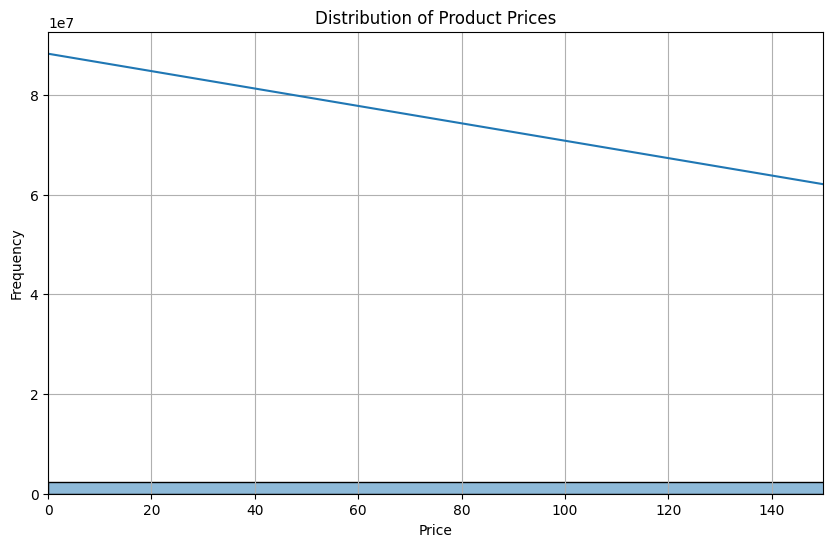

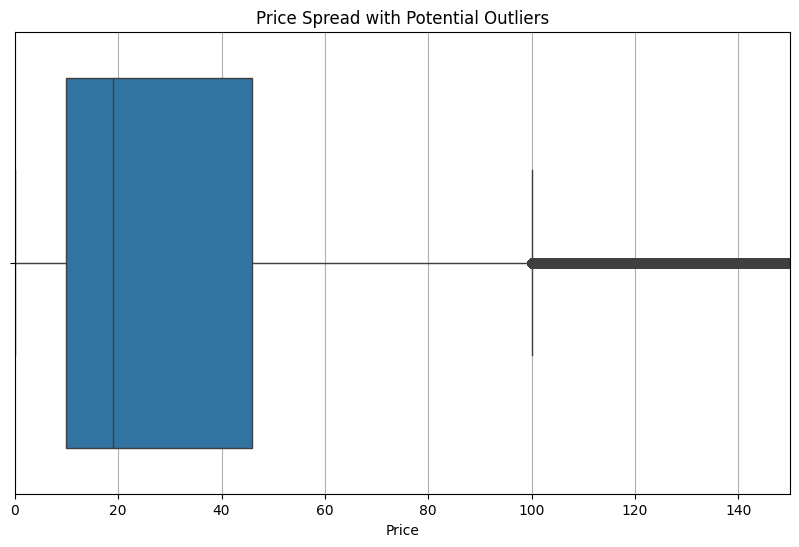

In [12]:
# Ensure 'price' is a numeric type (in case there are non-numeric entries)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# 3. Visualizations

# Histogram to visualize the distribution of product prices
# Question: Is there a specific price range where most products fall?
plt.figure(figsize=(10, 6))
sns.histplot(df['price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')


plt.xlim(0, df['price'].quantile(0.90))
plt.grid(True)
plt.show()

# Answer: Most products fall in 50$-150$ range


# Question: Are there products that are priced significantly higher than the rest?
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'].dropna())
plt.title('Price Spread with Potential Outliers')
plt.xlabel('Price')
plt.xlim(0, df['price'].quantile(0.90))
plt.grid(True)
plt.show()

# Answer: Products are uniformly priced.

Mean stars: 2.152836472966065
Median stars: 0.0
Mode stars: 0.0
Variance of stars: 4.817434029796862
Standard deviation of stars: 2.1948653785134207
Interquartile range (IQR) of stars: 4.4
Skewness of stars: 0.08120730776283354
Kurtosis of stars: -1.926004642549839


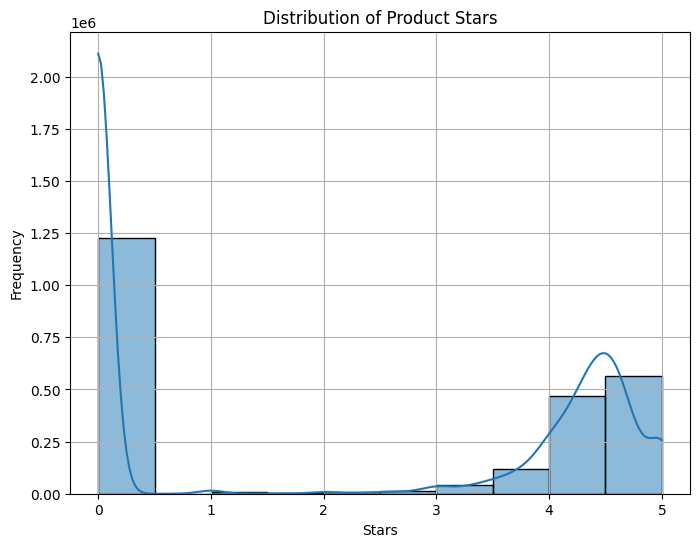

In [10]:
# Part 3: Unpacking Product Ratings (using 'stars' column)

# Question 1: Calculate the mean, median, and mode for the stars of products. How do customers generally rate products? Is there a common trend?
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]

# Answer: The data shows a clear trend toward negative customer feedback, with many products receiving low ratings.
print(f"Mean stars: {mean_stars}")
print(f"Median stars: {median_stars}")
print(f"Mode stars: {mode_stars}")

# Question 2: Calculate the variance, standard deviation, and interquartile range (IQR) for product stars. Are the ratings consistent, or is there a wide variation in customer feedback?
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
iqr_stars = np.percentile(df['stars'], 75) - np.percentile(df['stars'], 25)

# Answer: There are a wide variation of customer feedback.
print(f"Variance of stars: {variance_stars}")
print(f"Standard deviation of stars: {std_dev_stars}")
print(f"Interquartile range (IQR) of stars: {iqr_stars}")

# Question 3: Calculate the skewness and kurtosis for the stars column. Are the ratings normally distributed, or do they lean towards higher or lower values?
skewness_stars = skew(df['stars'].dropna())
kurtosis_stars = kurtosis(df['stars'].dropna())

# Answer: Rantings are not normally distributed, they lean towards lower values.
print(f"Skewness of stars: {skewness_stars}")
print(f"Kurtosis of stars: {kurtosis_stars}")

# Question 4: Plot a histogram to visualize the distribution of product stars. Is there a specific rating that is more common?
plt.figure(figsize=(8, 6))
sns.histplot(df['stars'], bins=10, kde=True)
plt.title('Distribution of Product Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#Answer: Most common rating are between 5 and 0 with a mean of 2.15



General Summary:
Categories: A small number of categories dominate product listings on Amazon UK.

Pricing: Most products are priced low, but there are significant outliers at higher price points.

Ratings: Overall low ratings indicate a wide variation in customer experiences, highlighting potential quality concerns.